<a href="https://colab.research.google.com/github/Kazantsev-Alexey/ML_DS/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9C%D0%B0%D1%81%D1%82%D0%B5%D1%80_%D0%BA%D0%BB%D0%B0%D1%81%D1%81_%D0%A0%D0%B0%D0%B7%D0%B2%D0%B5%D0%B4%D0%BE%D1%87%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%26_%D0%9F%D0%BE%D0%B4%D0%B3%D0%BE%D1%82%D0%BE%D0%B2%D0%BA%D0%B0_%D0%BE%D1%82%D1%87%D0%B5%D1%82%D0%BE%D0%B2_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skillbox — Мастер-класс: Разведочный анализ данных + Подготовка отчётов — Kiva.org
***

# Новый раздел

# 4. Домашнее задание
***

## 4.1. Самостоятельная работа
***

- А в каких странах преобладают мужчины? Группа людей? (п. 2.2.2.)
- Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей? (п. 2.4.2.)
- Попробуйте найти связь между странами (регионами), полом заёмщика и суммой заявки. Какие выводы можно сделать из этих данных? (п. 2.4.3.)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
kiva_loans = pd.read_csv('/content/kiva_loans.csv')
mpi = pd.read_csv('/content/kiva_mpi_region_locations.csv')
ids = pd.read_csv('/content/loan_theme_ids.csv')
region = pd.read_csv('/content/loan_themes_by_region.csv')

kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12.0,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14.0,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6.0,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8.0,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16.0,NaN,female,monthly,2014-01-01


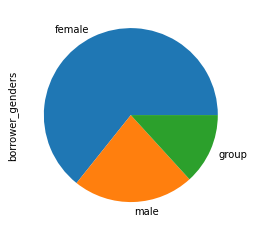

In [64]:
kiva_loans['borrower_genders'] = [a if a in ['female', 'male'] else 'group' for a in kiva_loans['borrower_genders']]
borrowers = kiva_loans['borrower_genders'].value_counts()
plot = borrowers.plot.pie()

In [25]:
countries = kiva_loans['country'].value_counts()[kiva_loans['country'].value_counts(normalize=True)>0.005]
list_countries = list(countries.index)
countries

Philippines                             4778
Kenya                                   2588
El Salvador                             1788
Pakistan                                1130
Peru                                     999
Uganda                                   804
Cambodia                                 793
Tajikistan                               787
Nicaragua                                693
Colombia                                 682
Liberia                                  565
Ecuador                                  493
Sierra Leone                             458
Paraguay                                 418
India                                    401
Palestine                                399
Honduras                                 386
Bolivia                                  361
Mali                                     333
Jordan                                   324
Armenia                                  309
Vietnam                                  283
Samoa     

In [61]:
gender =  kiva_loans[kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count().groupby(level=0).apply(lambda x:100*x/x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)
gender_male =  gender.sort_values(by='male', ascending=False)[:20]
gender_group = gender.sort_values(by='group', ascending=False)[:20][['group', 'female', 'male']]
gender_male

borrower_genders,female,group,male
country,,,
Azerbaijan,18.439716,0.000000,81.560284
Palestine,28.571429,0.751880,70.676692
Mongolia,43.243243,0.675676,56.081081
Georgia,48.850575,0.000000,51.149425
Uganda,43.034826,7.960199,49.004975
Armenia,52.427184,0.000000,47.572816
United States,43.274854,12.865497,43.859649
El Salvador,55.872483,3.131991,40.995526
Tajikistan,61.626429,0.508259,37.865311


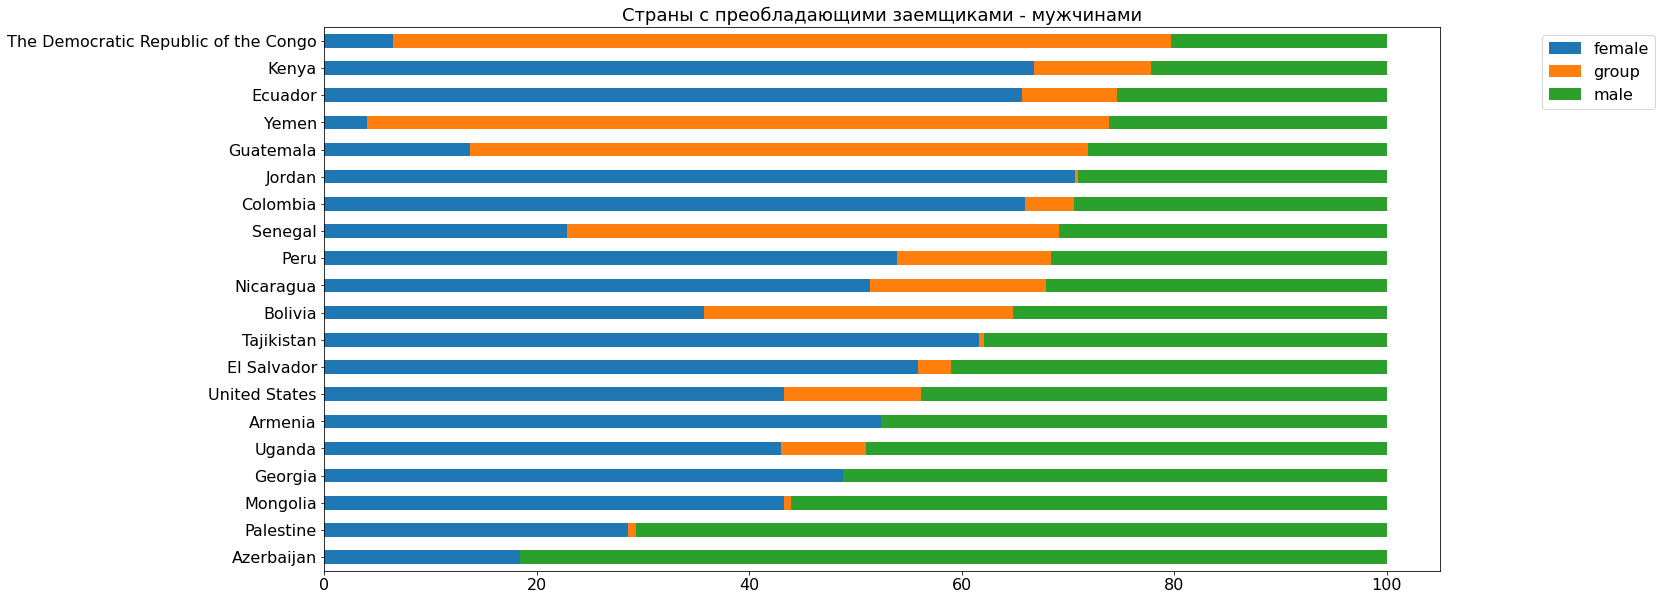

In [55]:
plot = gender_male.plot.barh(
        figsize=(20,10)
        , fontsize=16
        ,stacked=True
        , title = 'Страны с преобладающими заемщиками - мужчинами')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

Наибольший перевес в сторону мужчин заемщиков проследивается в Азердайджане и Палестине, но надо отметить что есть страны, где хоть мужчины и не являются большей частью заемщиков, но самостоятельно женщины все равно редко обращаются за займами как, например, Конго и Йемен. При этом баланс настолько смещен, что хоть Таджикистан и находится в топ 10 стран по количеству мужчин заемщиков, большаяя часть запросов, всё равно, поступает от женщин.     

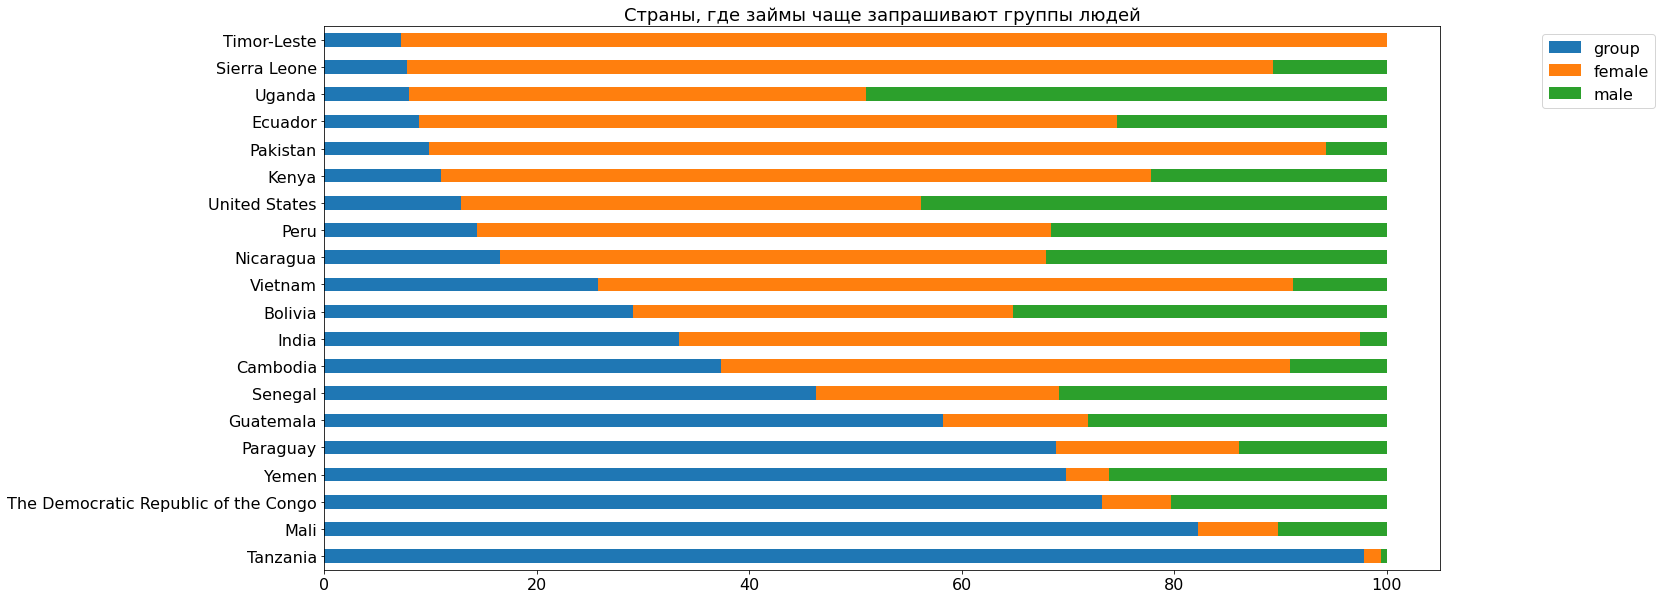

In [62]:
plot = gender_group.plot.barh(
        figsize=(20,10)
        , fontsize=16
        ,stacked=True
        , title = 'Страны, где займы чаще запрашивают группы людей')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

Танзания и Мали лидируют по количеству запросов от групп, мы можем предположить, что это связано с уровнем бедности и тем, что экономика в этих странах опирается на сельское хозяйство. В пользу этого говорят самый частые причины займов: Food Production/Sales, Retail, Cereals, Food Stall

In [29]:
kiva_loans.sort_values(by='loan_amount', ascending=False)[:20]\
.groupby(['country', 'sector', 'activity', 'borrower_genders'])['borrower_genders']\
.count().groupby(level=0).apply(lambda x:100*x/x.sum()).unstack('borrower_genders')


borrower_genders                                                                 female  ...        male
country                              sector        activity                              ...            
India                                Retail        Renewable Energy Products        NaN  ...  100.000000
The Democratic Republic of the Congo Clothing      Clothing Sales                   NaN  ...         NaN
                                                   Used Shoes                       NaN  ...         NaN
                                     Retail        Office Supplies                  NaN  ...         NaN
                                                   Plastics Sales                   NaN  ...         NaN
                                                   Retail                           NaN  ...         NaN
United States                        Agriculture   Agriculture                 8.333333  ...         NaN
                                     Entertainment Entertainment                    NaN  ...         NaN
                                     Food          Food Production/Sales      16.666667  ...         NaN
                                                   Food Stall                  8.333333  ...         NaN
                                     Manufacturing Metal Shop                       NaN  ...         NaN
                                     Retail        Cosmetics Sales                  NaN  ...    8.333333
                                                   General Store               8.333333  ...         NaN
                                     Services      Beauty Salon                     NaN  ...    8.333333
                                                   Secretarial Services        8.333333  ...         NaN
                                                   Services                         NaN  ...    8.333333

[16 rows x 3 columns]

Преимущественно запросы на самые большие займы поступают из США, и для подавляющего большинства 
заявок характерна активность, направленная на увеличение прибыли: Sales/Retail/Shop.


In [30]:
kiva_loans.sort_values(by='loan_amount', ascending=False)[:20]\
.groupby(['country', 'borrower_genders'])['borrower_genders']\
.count().groupby(level=0).apply(lambda x:100*x/x.sum()).unstack('borrower_genders')

borrower_genders,female,group,male
country,,,
India,NaN,NaN,100.0
The Democratic Republic of the Congo,NaN,100.0,NaN
United States,50.0,25.0,25.0



Для США большая часть крупных заявок поступает от одиночных заемщиков, что говоорит о финансовой возможности отдельных лиц самостоятельно организовывать предпринимательскую деятельность. Для сравнения, из Конго, наоборот, заяки поступают от групп и в одиночку человеку значительно труднее  выйти на такой уровень финансовой активности.

## 4.2. Домашняя работа
***

Расширьте наш отчёт исследованием следующих вопросов:

- Зависимость пола заёмщика от региона планеты, сектора экономики.
- Влияние такого атрибута займа, как **Количество кредиторов** (lender_count), на суммы и сроки займов.
- Влияние показателя **MPI** (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.
- Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе **макрорегионов**.

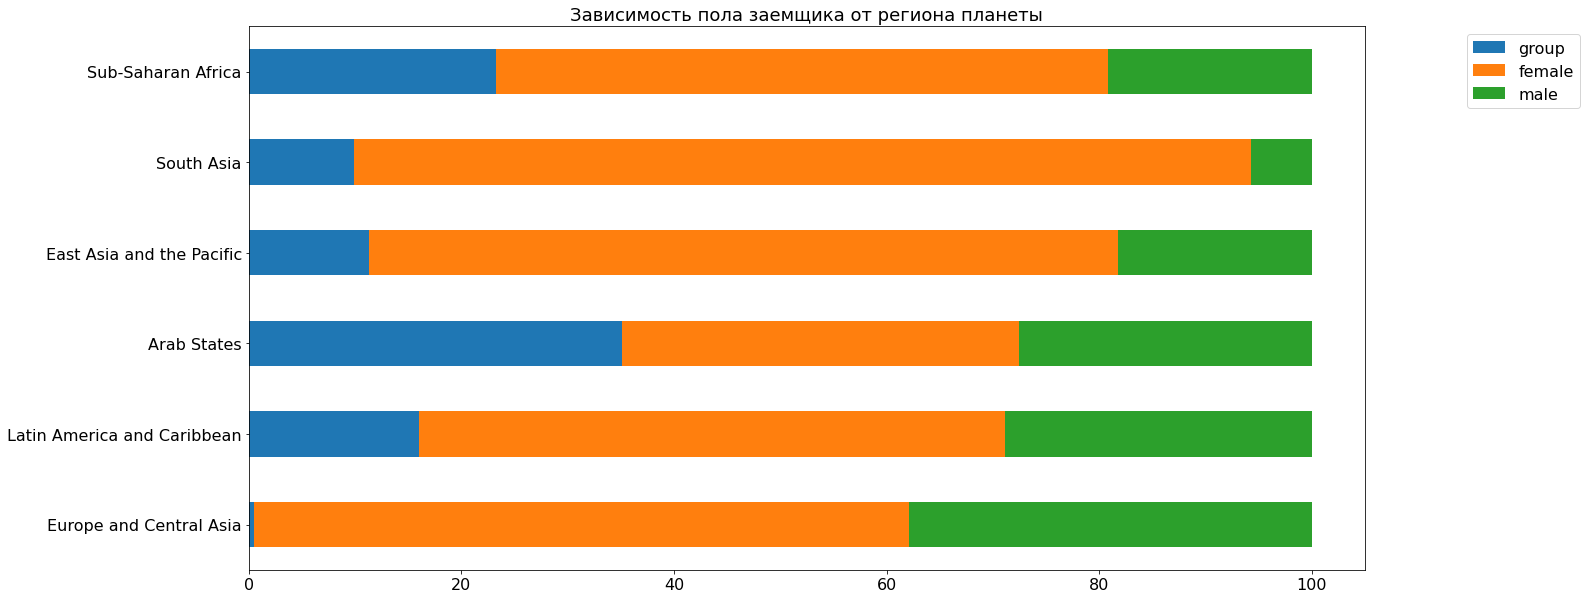

In [97]:
region_mpi = mpi.groupby(['country', 'world_region'], as_index=False).agg({'MPI':'mean'})

region =  kiva_loans[kiva_loans['country'].isin(countries.index.values)].reset_index(drop=True)
region = region.groupby(['country',  'borrower_genders'])['borrower_genders']\
    .count().groupby(level=0).apply(lambda x:100*x/x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)

region = region.reset_index()
region.index.name = None
region.columns.name = None
region = region.merge(region_mpi, how='left', left_on='country', right_on='country')\
    .dropna().reset_index(drop=True)\
    .groupby('world_region').agg('mean')\
    .sort_values(by='MPI')[['group', 'female', 'male']]
region

plot =  region.plot.barh(
        figsize=(20,10)
        , fontsize=16
        ,stacked=True
        , title = 'Зависимость пола заемщика от региона планеты')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

Мы уже видели ранее, что большпя часть заемщиков это женщины, но здесь мы можем заметить, что для всех макрорегионов кроме Европы и Центральной Азии характерно увеличение заемщиков-группу вместе с увеличением числа заемщиков-мужчин. Мы можем предположить, что мужчины чаще обращаются за займом вместе с кем-то в противовес тому, как часто женщины являются одичночными заемщиками

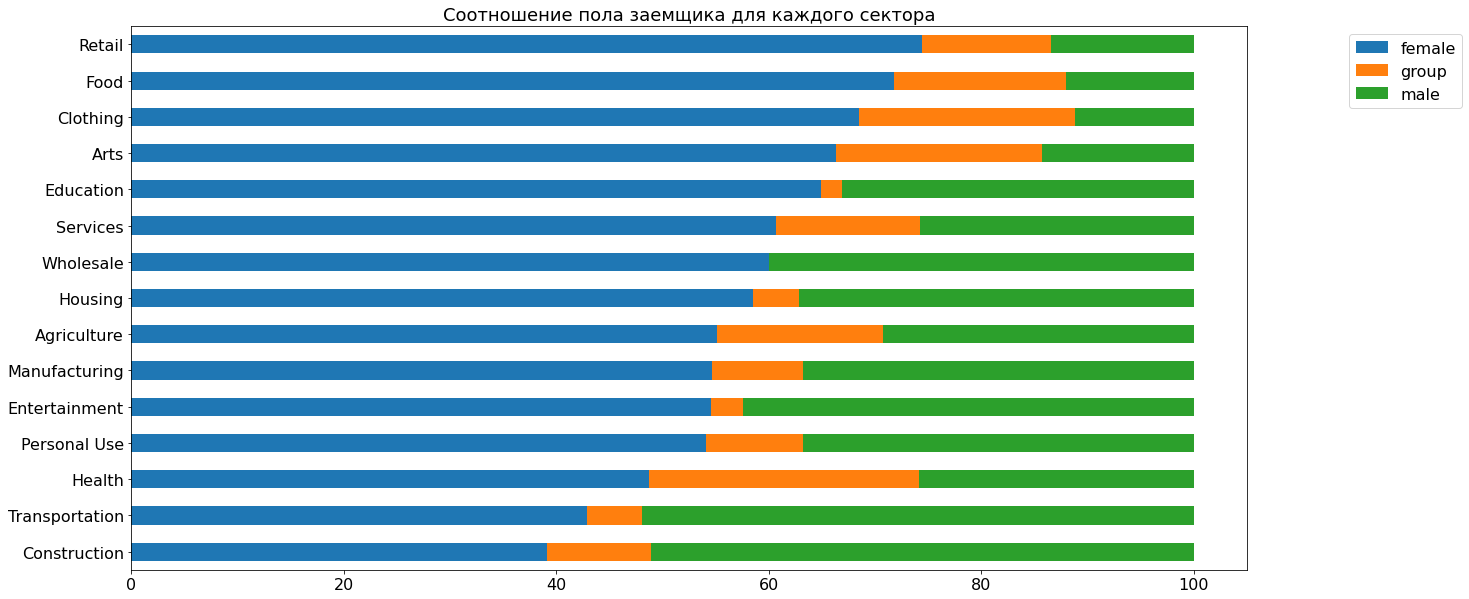

In [33]:
# region =  kiva_loans[kiva_loans['country'].isin(countries.index.values)].reset_index(drop=True)
region = kiva_loans.groupby(['sector',  'borrower_genders'])['borrower_genders']\
    .count().groupby(level=0).apply(lambda x:100*x/x.sum())\
    .unstack('borrower_genders')\
    .fillna(0).sort_values(by='female')

plot =  region.plot.barh(
        figsize=(20,10)
        , fontsize=16
        ,stacked=True
        , title = 'Соотношение пола заемщика для каждого сектора')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

Мы видим, что для женщин самым частыми сферами экономики являются пищевая промышленность и розничная торговля, в то время как для мужчин - это строительство и транспортировка 

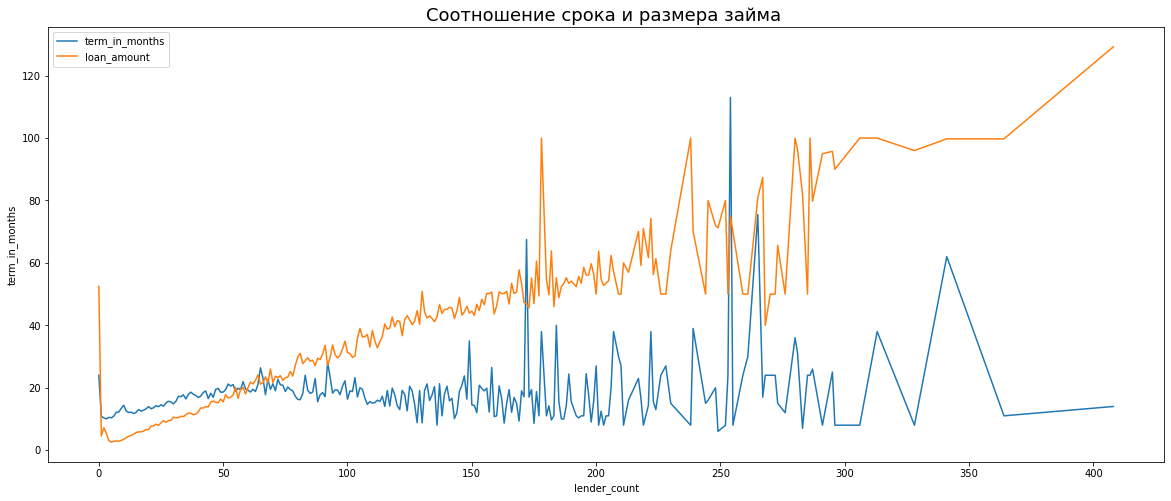

In [100]:
lender_count = kiva_loans.groupby('lender_count', as_index=False).agg('mean')\
    [['lender_count','term_in_months', 'loan_amount']]\
    .dropna().sort_values(by='lender_count', ascending=True)[:360]
lender_count['loan_amount'] = lender_count['loan_amount']/100 #### просто для наглядности
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data=lender_count, y='term_in_months', x='lender_count', label='term_in_months' )
sns.lineplot(data=lender_count, y='loan_amount', x='lender_count', label='loan_amount' )
plt.title('Соотношение срока и размера займа ').set_size(18)
plt.show()

На графике мы можем увидеть, что с  увеличением суммы займа и срока идет ожидаемое увеличение количества кредиторов при этом в некоторых случаях для финансирования заявки может потребоваться не так много кредиторов как ожидалось

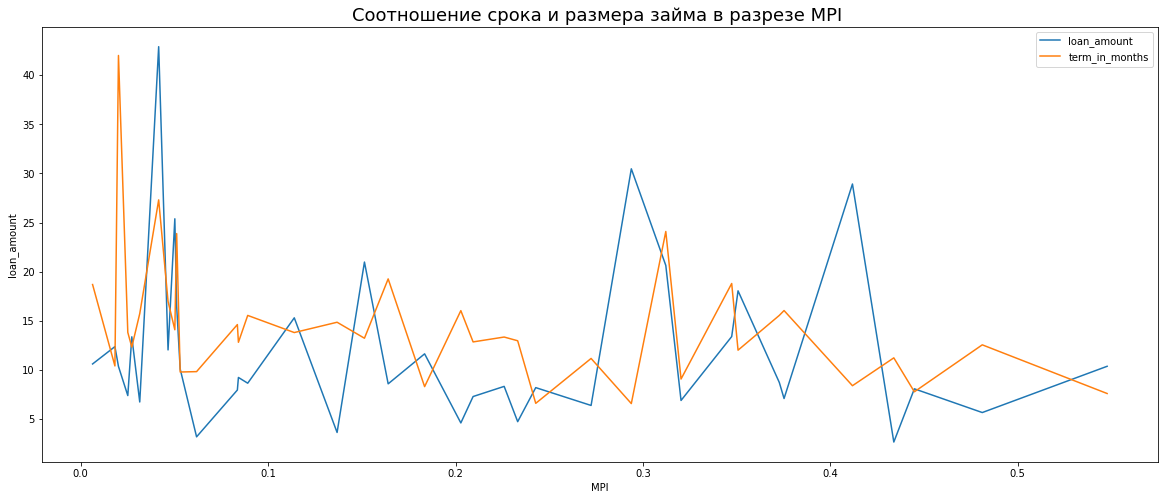

In [68]:
region_mpi = mpi.groupby('country', as_index=False).agg({'MPI':'mean'})

mpi_term_amount = kiva_loans[['country','term_in_months', 'loan_amount']]\
    .merge(region_mpi, how='left', left_on='country', right_on='country')
    
mpi_term_amount = mpi_term_amount.sort_values(by='loan_amount',ascending=True)[:-50]
mpi_term_amount = mpi_term_amount.dropna().reset_index(drop=True).groupby('country').agg('mean')
mpi_term_amount['loan_amount'] = mpi_term_amount['loan_amount']/100

fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data=mpi_term_amount, y='loan_amount', x='MPI', label='loan_amount' )
sns.lineplot(data=mpi_term_amount, y='term_in_months', x='MPI', label='term_in_months' )
plt.title('Соотношение срока и размера займа в разрезе MPI ').set_size(18)
plt.show()

Для стран с самым низким MPI характерны запросы с самыми большими суммами и сроками. Надо полагать, что высокий уровень жизни в стране позволяет уверенней распоряжаться ресурсами и открывает возможности для возврата средств. В диапазоне от 0.1 до 0.25 мы наблюдаем спад. Но в районе 0.3 - 0.4 мы видим еще несколько скачков роста и можем предположить, что в бедных странах часто поступают запросы на займ для того, чтобы заняться предпринимательством и значительно изменить жизнь. Но в самых бедных странах уже нет скачков роста и, соответственно, самые низкие суммы займов. В этих случаях люди чаще всего занимают на вещи первой необходимости.  

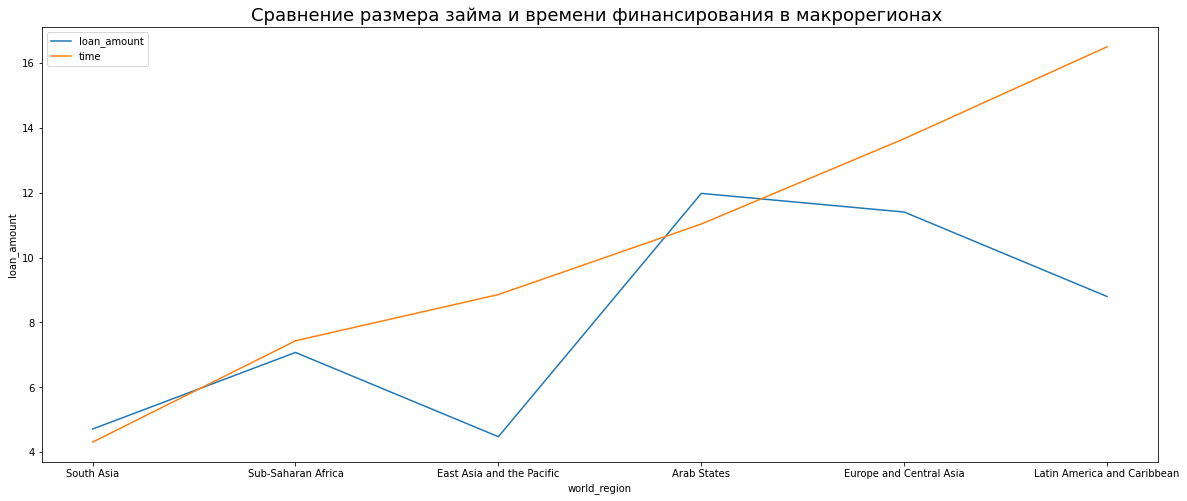

In [113]:
# import date from d as dt  

region_mpi = mpi.groupby(['country', 'world_region'], as_index=False).agg({'MPI':'mean'})

mcr_rgn = kiva_loans[['country', 'loan_amount', 'term_in_months', 'posted_time', 'funded_time']]\
    .merge(region_mpi, how='left', left_on='country', right_on='country')\
    .dropna().reset_index(drop=True)
mcr_rgn['month_pay'] = mcr_rgn['loan_amount']/ mcr_rgn['term_in_months']
mcr_rgn['funded_time'] = pd.to_datetime(mcr_rgn['funded_time'])
mcr_rgn['posted_time'] = pd.to_datetime(mcr_rgn['posted_time'])
mcr_rgn['time'] = (mcr_rgn['funded_time'] - mcr_rgn['posted_time']).dt.days
mcr_rgn = mcr_rgn.groupby('world_region', as_index=False).agg('mean').sort_values(by='time')
mcr_rgn['loan_amount'] = mcr_rgn['loan_amount']/100 ##### просто для визуального сравнения, чтобы были видны изменения на графике
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data=mcr_rgn, x='world_region', y='loan_amount', label='loan_amount' )
sns.lineplot(data=mcr_rgn, x='world_region', y='time', label='time' )
plt.title('Сравнение размера займа и времени финансирования в макрорегионах ').set_size(18)
plt.show()

Сроки, в которые заявка финансируется имеют разноо соотношение с суммой займа. Например, в Восточной Азии средняя сумма значительно ниже чем в Африике, но времени для сбора требует больше. Также как и в Латинской Америке по сравнению с Европой.

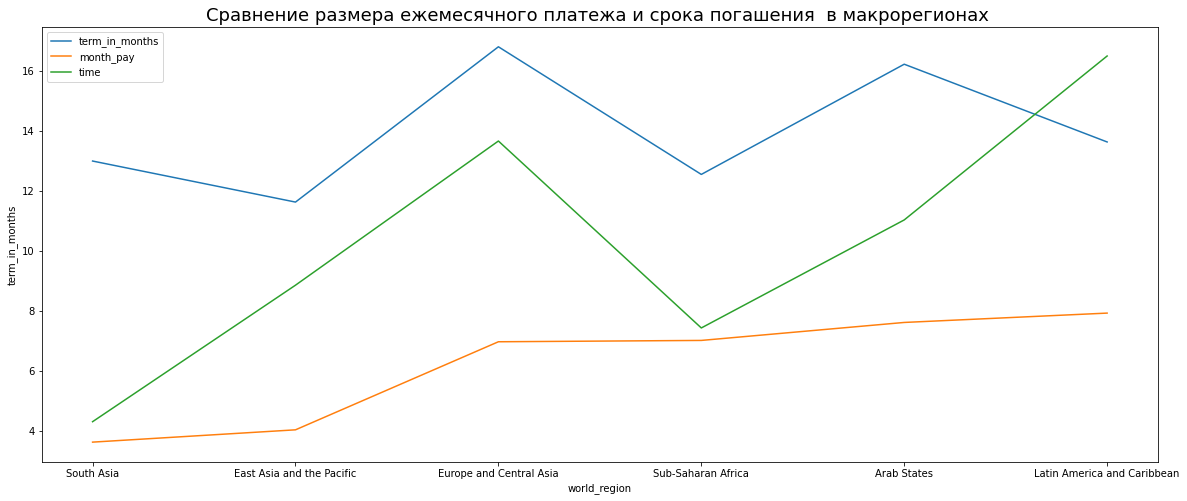

In [117]:
mcr_rgn['month_pay'] = mcr_rgn['month_pay']/10
mcr_rgn = mcr_rgn.sort_values(by='term_in_months')
fig, ax = plt.subplots(figsize=(20, 8))
mcr_rgn = mcr_rgn.sort_values(by='month_pay')
mcr_rgn['month_pay'] = mcr_rgn['month_pay']*100 ##### просто для визуального сравнения, чтобы были видны изменения на графике

sns.lineplot(data=mcr_rgn, x='world_region', y='term_in_months', label='term_in_months' )
sns.lineplot(data=mcr_rgn, x='world_region', y='month_pay', label='month_pay' )
sns.lineplot(data=mcr_rgn, x='world_region', y='time', label='time' )

plt.title('Сравнение размера ежемесячного платежа и срока погашения  в макрорегионах ').set_size(18)
plt.show()


В сравнении срока кредитования и размере ежемесячного платежа мы видим, что во всем мире заемщики запрашивают срок и сумму так, что платеж получается примерно одинаковый, за исключением Азии, там просто ниже размер займа. При этом время, которое требуется на сбор средств коррелирует со сроком займа, но не для Латинской Америки и Южной Азии. И когда для Южной Азии это можно объяснить тем, что там самые маленькие суммы и их легко собрать. То в случае с Латинской Америкой суммы довольно большие относительно срока, платеж больше чем в остальном мире, хотя уровень жизни не такой высокий как например в Европе.
Это может быть причиной того, что кредиторы не очень охотно кредитуют займы, которые будет сложно вернуть. 